In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

C:\Ashok\Learning\ML\AV\LP\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
train_data = pd.read_csv("./accidentseverity/Accident_train.csv")
test_data = pd.read_csv("./accidentseverity/Accident_test.csv")

In [ ]:
len(test_data)

In [3]:
def change_column_order(df, col_name, index):
    cols = df.columns.tolist()
    cols.remove(col_name)
    cols.insert(index, col_name)
    return df[cols]

In [4]:
train_data = change_column_order(train_data, 'Collision_Severity', 16)
train_data.head(5)

,Collision_Ref_No,Policing_Area,Weekday_of_Collision,Day_of_Collision,Month_of_Collision,Hour_of_Collision,Carriageway_Type,Speed_Limit,Junction_Detail,Junction_Control,Ped_Crossing_HC,Ped_Crossing_PC,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Collision_Severity
0,3518,CREA,MON,4,8,14.0,13,60,1.0,1.0,1.0,1.0,2,9,9.0,1.0,3
1,10557,BELC,SAT,8,8,17.0,11,50,12.0,7.0,1.0,1.0,4,3,1.0,1.0,3
2,5002,LISB,WED,5,11,17.0,1,60,12.0,7.0,1.0,1.0,2,2,2.0,1.0,3
3,11714,BELC,SUN,18,10,16.0,12,70,6.0,NaN,1.0,1.0,1,3,1.0,1.0,3
4,12416,MIDU,MON,23,11,9.0,13,60,6.0,7.0,1.0,1.0,2,3,1.0,1.0,3


In [5]:
test_data = change_column_order(test_data, 'Collision_Severity', 16)
test_data.head(5)

,Collision_Ref_No,Policing_Area,Weekday_of_Collision,Day_of_Collision,Month_of_Collision,Hour_of_Collision,Carriageway_Type,Speed_Limit,Junction_Detail,Junction_Control,Ped_Crossing_HC,Ped_Crossing_PC,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Collision_Severity
0,812,DAST,MON,17,2,21.0,13,60,10.0,7.0,1.0,1.0,5.0,9.0,6.0,1.0,Predict
1,7159,ARBC,TUE,13,1,8.0,13,60,10.0,NaN,1.0,1.0,7.0,1.0,1.0,1.0,Predict
2,11833,NEMD,SAT,24,10,18.0,13,30,6.0,7.0,1.0,1.0,6.0,1.0,1.0,1.0,Predict
3,9142,MEAN,SUN,10,5,13.0,11,70,12.0,7.0,1.0,1.0,1.0,9.0,1.0,1.0,Predict
4,378,FOYL,THU,23,1,10.0,13,60,1.0,1.0,1.0,1.0,2.0,3.0,2.0,1.0,Predict


In [6]:
train_data.corr()

,Collision_Ref_No,Day_of_Collision,Month_of_Collision,Hour_of_Collision,Carriageway_Type,Speed_Limit,Junction_Detail,Junction_Control,Ped_Crossing_HC,Ped_Crossing_PC,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Collision_Severity
Collision_Ref_No,1.000000,0.049935,0.446056,0.019073,0.002737,0.008134,-0.001996,-0.007828,-0.010353,0.014782,0.008228,0.005065,0.000497,0.016017,0.013492
Day_of_Collision,0.049935,1.000000,-0.019070,0.022296,0.022657,0.031141,-0.023143,-0.019671,0.006793,-0.011090,0.005269,0.011288,-0.001234,0.000993,-0.018926
Month_of_Collision,0.446056,-0.019070,1.000000,0.007974,-0.004092,-0.003941,0.004643,-0.001485,-0.001251,0.009076,0.019153,-0.002955,-0.000022,-0.005897,0.011478
Hour_of_Collision,0.019073,0.022296,0.007974,1.000000,-0.012227,-0.059847,0.033777,0.027868,0.003221,0.005514,0.192207,-0.013430,0.007217,0.011511,0.012390
Carriageway_Type,0.002737,0.022657,-0.004092,-0.012227,1.000000,0.090648,0.007064,-0.013764,0.013350,-0.012989,0.012917,0.001740,0.006505,0.004160,-0.035311
Speed_Limit,0.008134,0.031141,-0.003941,-0.059847,0.090648,1.000000,-0.088983,-0.052281,-0.035023,-0.159120,0.091880,-0.028234,0.059435,-0.024817,-0.113594
Junction_Detail,-0.001996,-0.023143,0.004643,0.033777,0.007064,-0.088983,1.000000,0.862894,0.045733,0.122103,-0.011562,0.007537,-0.084159,-0.012198,0.027930
Junction_Control,-0.007828,-0.019671,-0.001485,0.027868,-0.013764,-0.052281,0.862894,1.000000,-0.022113,-0.051968,-0.002238,0.000018,-0.104099,-0.022975,0.020422
Ped_Crossing_HC,-0.010353,0.006793,-0.001251,0.003221,0.013350,-0.035023,0.045733,-0.022113,1.000000,0.154319,-0.017335,-0.003501,-0.002986,0.105527,0.006588
Ped_Crossing_PC,0.014782,-0.011090,0.009076,0.005514,-0.012989,-0.159120,0.122103,-0.051968,0.154319,1.000000,-0.058770,0.007823,-0.001199,0.002156,0.022577


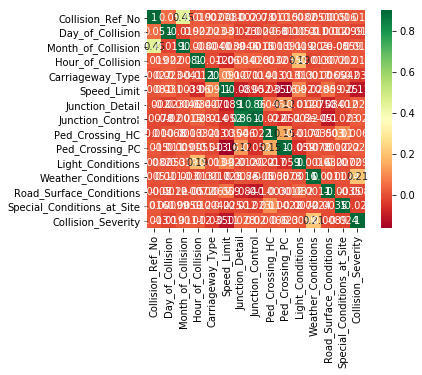

In [7]:
def accident_corr(data):
    correlation = data.corr()
    sns.heatmap(correlation, annot=True, cbar=True, cmap="RdYlGn",vmax=.9, square=True)
    
accident_corr(train_data)

In [8]:
#X_train, X_test, y_train, y_test = train_test_split( train_data.iloc[:,0:16], train_data.iloc[:,16:17], test_size = 0.3, random_state = 100)
X_train = train_data.iloc[:,0:16]
y_train = train_data.iloc[:,16:17]
X_test = test_data.iloc[:,0:16]
y_test = test_data.iloc[:,16:17]

In [9]:
columns = ['Policing_Area', 'Weekday_of_Collision']
#,'Junction_Control','Special_Conditions_at_Site']
X_train.drop(columns, inplace=True, axis=1)
X_test.drop(columns, inplace=True, axis=1)

In [ ]:
X_test.shape

In [10]:
np.count_nonzero(X_train.isnull().values)

1827

In [11]:
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)
#df.dropna(axis=1, how='any') #remve all column where any value is 'NaN' exists
#X_train = X_train.dropna(axis=1, how='any')
#X_test = X_test.dropna(axis=1, how='any')
#X_test.dropna()

In [12]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [13]:
y_pred = clf_gini.predict(X_test)
y_pred

array([3, 3, 3, ..., 3, 3, 3], dtype=int64)

In [ ]:
y_pred.shape

In [ ]:
#print("Accuracy is ", accuracy_score(y_test,y_pred)*100)

In [ ]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

In [ ]:
y_pred = clf_entropy.predict(X_test)
y_pred

In [ ]:
print("Accuracy is ", accuracy_score(y_test,y_pred)*100)

In [18]:
df = pd.DataFrame(y_pred)
#df1 = df.shift()[1:]
df.index = np.arange(1, len(df)+1)
df
#df1=pd.DataFrame[[y_pred], columns = ["S.No.", "Collision_Severity"])
df.to_csv('team1_submission.csv')

In [ ]:
len(df)

In [ ]:
df